In [53]:
import pandas as pd
df= pd.read_csv("C:\\Users\\Sanvi\\Desktop\\training.tsv",sep="\t",names =["user_id","activity_date", "activity_type"])
df.head()

,user_id,activity_date,activity_type
0,000b465f890b792,2013-11-20,WebVisit
1,000b465f890b792,2013-11-22,PageView
2,000b465f890b792,2013-11-22,WebVisit
3,000b465f890b792,2013-11-25,PageView
4,000b465f890b792,2013-11-25,WebVisit


In [54]:
df.shape

(4908077, 3)

In [55]:
df.activity_date = pd.to_datetime(df.activity_date)
df.activity_date

0         2013-11-20
1         2013-11-22
2         2013-11-22
3         2013-11-25
4         2013-11-25
             ...    
4908072   2013-08-08
4908073   2013-08-09
4908074   2014-04-10
4908075   2015-02-24
4908076   2015-04-02
Name: activity_date, Length: 4908077, dtype: datetime64[ns]

In [56]:
df['weekday'] = df['activity_date'].dt.day_name()
df['month'] = df['activity_date'].dt.month_name(locale=None)
df['year'] = df['activity_date'].dt.year
df.head()

,user_id,activity_date,activity_type,weekday,month,year
0,000b465f890b792,2013-11-20,WebVisit,Wednesday,November,2013
1,000b465f890b792,2013-11-22,PageView,Friday,November,2013
2,000b465f890b792,2013-11-22,WebVisit,Friday,November,2013
3,000b465f890b792,2013-11-25,PageView,Monday,November,2013
4,000b465f890b792,2013-11-25,WebVisit,Monday,November,2013


In [57]:
df= df.drop(["activity_date"],axis=1)
df.head()

,user_id,activity_type,weekday,month,year
0,000b465f890b792,WebVisit,Wednesday,November,2013
1,000b465f890b792,PageView,Friday,November,2013
2,000b465f890b792,WebVisit,Friday,November,2013
3,000b465f890b792,PageView,Monday,November,2013
4,000b465f890b792,WebVisit,Monday,November,2013


In [58]:
activity_type=pd.get_dummies(df['activity_type'])
df=pd.concat([df,activity_type],axis=1)
df.drop(['activity_type'],inplace=True,axis=1)
df.head()

,user_id,weekday,month,year,CustomerSupport,EmailClickthrough,EmailOpen,FormSubmit,PageView,Purchase,WebVisit
0,000b465f890b792,Wednesday,November,2013,0,0,0,0,0,0,1
1,000b465f890b792,Friday,November,2013,0,0,0,0,1,0,0
2,000b465f890b792,Friday,November,2013,0,0,0,0,0,0,1
3,000b465f890b792,Monday,November,2013,0,0,0,0,1,0,0
4,000b465f890b792,Monday,November,2013,0,0,0,0,0,0,1


In [59]:
df1= pd.get_dummies(df[['weekday','month']])
df= pd.concat([df,df1],axis=1)
df.head()

,user_id,weekday,month,year,CustomerSupport,EmailClickthrough,EmailOpen,FormSubmit,PageView,Purchase,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,000b465f890b792,Wednesday,November,2013,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,000b465f890b792,Friday,November,2013,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,000b465f890b792,Friday,November,2013,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,000b465f890b792,Monday,November,2013,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,000b465f890b792,Monday,November,2013,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
df= df.drop(["weekday","month"],axis=1)
df.head()

,user_id,year,CustomerSupport,EmailClickthrough,EmailOpen,FormSubmit,PageView,Purchase,WebVisit,weekday_Friday,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,000b465f890b792,2013,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,000b465f890b792,2013,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,000b465f890b792,2013,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,000b465f890b792,2013,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,000b465f890b792,2013,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [61]:
df.columns

Index(['user_id', 'year', 'CustomerSupport', 'EmailClickthrough', 'EmailOpen',
       'FormSubmit', 'PageView', 'Purchase', 'WebVisit', 'weekday_Friday',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'month_April', 'month_August', 'month_December', 'month_February',
       'month_January', 'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September'],
      dtype='object')

In [62]:
group1=['user_id', 'CustomerSupport', 'EmailClickthrough', 'EmailOpen',
       'FormSubmit', 'PageView', 'Purchase', 'WebVisit', 'year']
group2=['weekday_Sunday','weekday_Monday', 'weekday_Tuesday','weekday_Wednesday','weekday_Thursday','weekday_Friday','weekday_Saturday']
group3=['month_January','month_February','month_March','month_April','month_May','month_June','month_July','month_August','month_September','month_October','month_November','month_December']
new_col=group1+group2+group3


In [63]:
set(df.columns)==set(new_col)
df=df[new_col]
df.columns

Index(['user_id', 'CustomerSupport', 'EmailClickthrough', 'EmailOpen',
       'FormSubmit', 'PageView', 'Purchase', 'WebVisit', 'year',
       'weekday_Sunday', 'weekday_Monday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weekday_Thursday', 'weekday_Friday',
       'weekday_Saturday', 'month_January', 'month_February', 'month_March',
       'month_April', 'month_May', 'month_June', 'month_July', 'month_August',
       'month_September', 'month_October', 'month_November', 'month_December'],
      dtype='object')

In [64]:
df['user_id'] = df.user_id.astype('category').cat.codes
df.head(20)

,user_id,CustomerSupport,EmailClickthrough,EmailOpen,FormSubmit,PageView,Purchase,WebVisit,year,weekday_Sunday,...,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December
0,0,0,0,0,0,0,0,1,2013,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,2013,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,2013,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,2013,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,2013,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,1,0,0,2013,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,1,2013,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,1,0,0,2013,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,1,2013,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,1,0,0,2013,0,...,0,0,0,0,0,0,0,0,1,0


C:\Users\Sanvi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


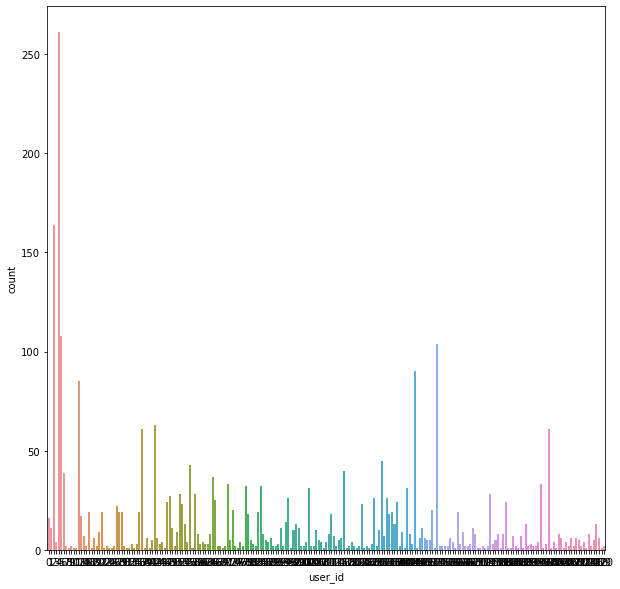

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.countplot(df['user_id'])
plt.show()

In [65]:
X=df.drop(['user_id'],axis=1)
X

,CustomerSupport,EmailClickthrough,EmailOpen,FormSubmit,PageView,Purchase,WebVisit,year,weekday_Sunday,weekday_Monday,...,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December
0,0,0,0,0,0,0,1,2013,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,2013,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,2013,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,2013,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,2013,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4908072,0,0,1,0,0,0,0,2013,0,0,...,0,0,0,0,0,1,0,0,0,0
4908073,0,0,1,0,0,0,0,2013,0,0,...,0,0,0,0,0,1,0,0,0,0
4908074,0,0,0,1,0,0,0,2014,0,0,...,0,1,0,0,0,0,0,0,0,0
4908075,0,0,0,0,0,1,0,2015,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
y=df['user_id']
y

0               0
1               0
2               0
3               0
4               0
            ...  
4908072    340874
4908073    340874
4908074    340875
4908075    340876
4908076    340876
Name: user_id, Length: 4908077, dtype: int32

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.3)

In [68]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(X_train,y_train)
temp=logr.predict(X_test)
print("Accuracy Score on testing data set",accuracy_score(temp,y_test))

MemoryError: Unable to allocate 7.93 TiB for an array with shape (3435653, 317232) and data type int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print("Accuracy Score on testing data set",accuracy_score(y_pred,y_test))